In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [4]:
df_train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [5]:
df_test.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [6]:
df_x_train = df_train.drop(labels=["median_house_value"], axis=1)
df_y_train = df_train[["median_house_value"]]
df_x_test = df_test.drop(labels=["median_house_value"], axis=1)
df_y_test = df_test[["median_house_value"]]

print(df_x_train.shape, df_y_train.shape, df_x_test.shape, df_y_test.shape)

(17000, 8) (17000, 1) (3000, 8) (3000, 1)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_nrm = scaler.fit_transform(df_x_train)
x_test_nrm = scaler.transform(df_x_test)

In [8]:
print(x_test_nrm.std(0))

[0.99476155 0.99627452 0.99735719 0.98869255 0.98599727 0.8976773
 0.9502022  0.97175318]


In [9]:
y_train = df_y_train.values
y_test = df_y_test.values

In [71]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=x_train_nrm.shape[1:]))

model.add(Dense(256, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, 'linear'))

In [77]:
model.compile(optimizer='adam', loss="mae", metrics="mse")

In [73]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               4608      
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 64)                16448     
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 1)                 33        
                                                                 
Total params: 154,497
Trainable params: 154,497
Non-trainable params: 0
_________________________________________________________________


In [79]:
results = model.fit(
    x_train_nrm, y_train, epochs=2,
    validation_data=(x_test_nrm, y_test), batch_size=32)

Epoch 1/2
532/532 [==============================] - 4s 7ms/step - loss: 37945.6758 - mse: 3255940096.0000 - val_loss: 38988.3594 - val_mse: 3573083136.0000
Epoch 2/2
532/532 [==============================] - 3s 5ms/step - loss: 37817.2578 - mse: 3230028800.0000 - val_loss: 38501.1055 - val_mse: 3478280704.0000


In [40]:
yhat_test = model.predict(x_test_nrm)

94/94 [==============================] - 0s 1ms/step


In [41]:
import matplotlib.pyplot as plt

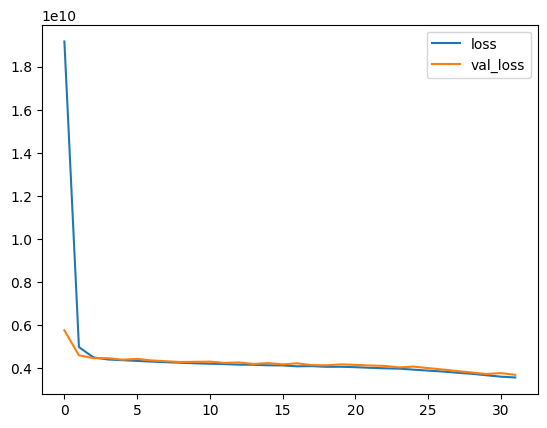

In [61]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.legend()

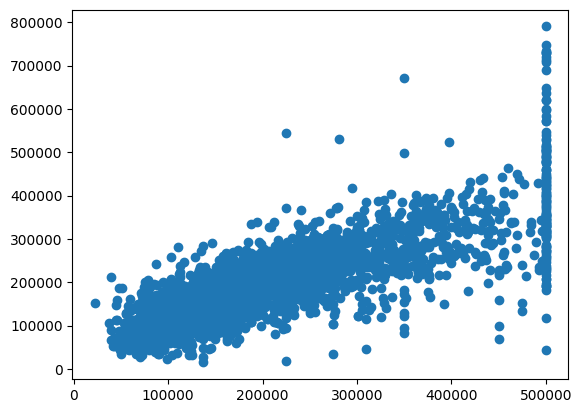

In [16]:
plt.scatter(y_test, yhat_test)